In [1]:
from scipy.stats import binom, norm, chi2, uniform, kstwobign, multinomial
import matplotlib.pyplot as plt 
import numpy as np
import math
import prettytable, sys

sys.path.insert(1, "../../python")
from statistical_distributions import normal_distributions

## Illustration 
$\chi^2$ with different degrees of freedom. 

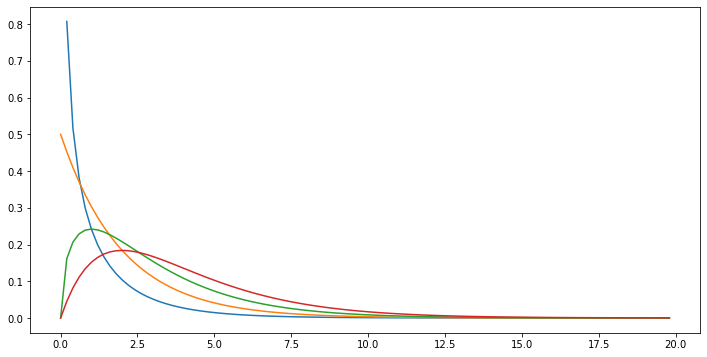

In [2]:
n, p  = 100, 0.5
mean = n*p 
std = math.sqrt(n*p*(1-p))
obs = 56
x_disc = np.arange(0, n+1, 1) 
x_conti = np.arange(0, n+1, 0.01)
x_conti = np.arange(0, 20, 0.2)


binom_pdf = binom.pmf(x_disc, n=n, p=p)
normal_pdf = norm.pdf(x_disc, mean, std)
normal_partial_pdf = norm.pdf(x_disc, mean, std)
mulinomial_pdf = multinomial.pmf([3, 4], n=7, p=[0.4, 0.6])
chi2_1df_pdf = chi2.pdf(x_conti, df=1)
chi2_2df_pdf = chi2.pdf(x_conti, df=2)
chi2_3df_pdf = chi2.pdf(x_conti, df=3)
chi2_4df_pdf = chi2.pdf(x_conti, df=4)
plt.figure(figsize=(12,6))
plt.plot(x_conti, chi2_1df_pdf)
plt.plot(x_conti, chi2_2df_pdf)
plt.plot(x_conti, chi2_3df_pdf)
plt.plot(x_conti, chi2_4df_pdf)

plt.show()

## Illustration  
$N(0,1)$ and p-value

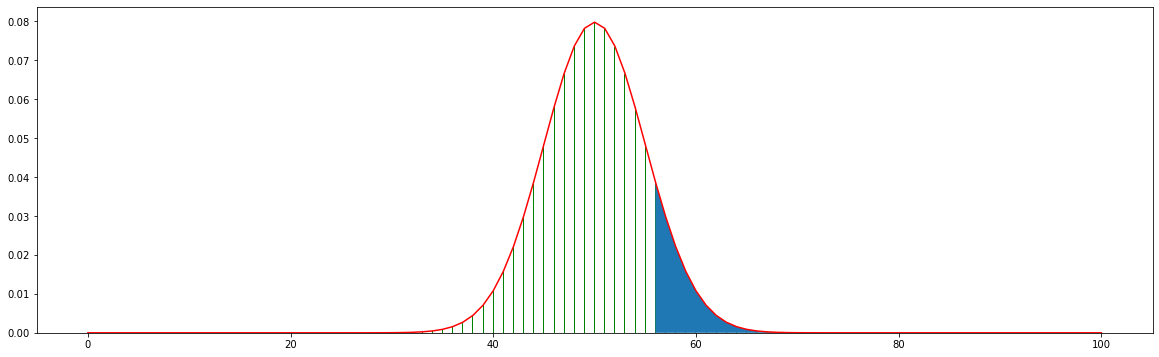

In [3]:
n, p  = 100, 0.5
mean = n*p 
std = math.sqrt(n*p*(1-p))
obs = 56
plt.figure(figsize=(20,6))
plt.bar(np.arange(0, n+1, 1), binom.pmf(np.arange(0, n+1, 1), n=n, p=p), width= 0.1, color = 'g') 
plt.plot(np.arange(0, n+1, 1), norm.pdf(np.arange(0, n+1, 1), mean, std), color = 'r') 
plt.fill_between(np.arange(obs, n, 1), norm.pdf(np.arange(obs, n, 1), mean, std))
plt.show()

(162.8098351454432, 237.19016485455708)
(182.99625318579186, 257.00374681420845)
(441.1971862512279, 558.8028137487726)
(491.49193905345135, 608.5080609465491)
(1882.3943725024558, 2117.605627497545)
(2082.983878106903, 2317.016121893098)
[162.8098351454432, 182.99625318579186, 441.1971862512279, 491.49193905345135, 1882.3943725024558, 2082.983878106903]
[237.19016485455708, 257.00374681420845, 558.8028137487726, 608.5080609465491, 2117.605627497545, 2317.016121893098]


<Figure size 432x216 with 0 Axes>

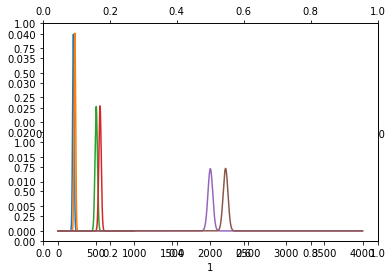

In [4]:
coin_trials = [400, 400, 1000, 1000, 4000, 4000]    
head_probs = [0.5, 0.55, 0.5, 0.55, 0.5, 0.55]
number_of_dists = len(coin_trials)
colors = ['grey', 'black', 'grey', 'black']
alpha = 0.005

distributions = [normal_distributions(n=coin_trials[i], p=head_probs[i], alpha= alpha) for i in range(number_of_dists)]
x_absolute_left = [distributions[i]['distribution_absolute']['x_range'][0] for i in range(number_of_dists)]
x_absolute_right = [distributions[i]['distribution_absolute']['x_range'][1] for i in range(number_of_dists)]

fig = plt.figure(figsize=(6,3))
fig, (ax1, ax2) = plt.subplots(2)
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.set_xlabel(r"1")
for i in range(number_of_dists):
    ax1.plot(distributions[i]['distribution_absolute']['x'],distributions[i]['distribution_absolute']['pdf'])
print(x_absolute_left)
print(x_absolute_right)
# ax1.set_xlim(min(x_absolute_left), max(x_absolute_right))
plt.show()

In [13]:
def image(distribution_rand, distribution_bias, text_y = 0.5, file_name = 'Smallest.png'):
    fig, ax1 = plt.subplots(figsize=(20,10))  
    font_size = 30
    tick_size = 20
    text_size = 15
    ax2 = ax1.twiny()
    ax1.set_xlabel(r"Observations (relative)", fontsize=font_size)
    
    ax1.plot(
        distribution_rand['distribution_absolute']['x'],
        distribution_rand['distribution_absolute']['pdf'],
        color = colors[0]
    )
    ax1.plot(
        distribution_bias['distribution_absolute']['x'],
        distribution_bias['distribution_absolute']['pdf'],
        color = colors[1]
    )
    
    x_relative_left = [distribution_rand['distribution_relative']['x_range'][0], distribution_bias['distribution_relative']['x_range'][0]]
    x_relative_right = [distribution_rand['distribution_relative']['x_range'][1], distribution_bias['distribution_relative']['x_range'][1]]
    
    ax1.set_ylabel("Probability density", fontsize=font_size)
    # ax1.set_xlim(min(x_relative_left), max(x_relative_right))
    ax1.set_xlim(0.44, 0.6)
    
    x_c = distribution_rand['distribution_absolute']['x_right_critical']
    x_c_relative = distribution_rand['distribution_relative']['x_right_critical']
    
    y_c_rand = distribution_rand['funcs_absolute']['pdf'](x_c)
    y_c_bias = distribution_bias['funcs_absolute']['pdf'](x_c)
    # y_text = distribution_bias['distribution_relative']['ymax']  
    beta_error = distribution_bias['funcs_absolute']['cdf'](x_c)
    
    ax1.text(x_c_relative,text_y, r'$\beta$=%s'%(round(beta_error, 3)), size=2*text_size, 
             horizontalalignment ='left', verticalalignment='center',
             transform = ax1.transAxes)
    
    ax1.vlines(x=x_c_relative, ymin=0, ymax=y_c_bias, color='black')
    
    idx = distribution_bias['distribution_relative']['x'].searchsorted(x_c_relative, 'right')
    ax1.fill_between( distribution_bias['distribution_relative']['x'][:idx],
                      distribution_bias['distribution_absolute']['pdf'][:idx], 
                      facecolor="none", edgecolor='black', hatch="//")
    ax1.fill_between( distribution_bias['distribution_relative']['x'][idx-1:],
                      distribution_bias['distribution_absolute']['pdf'][idx-1:], 
                      facecolor="none", edgecolor='black', hatch="")
    
    idx = distribution_rand['distribution_relative']['x'].searchsorted(x_c_relative, 'right')
    ax1.fill_between( distribution_rand['distribution_relative']['x'][:idx],
                      distribution_rand['distribution_absolute']['pdf'][:idx], 
                      facecolor="none", edgecolor='black', hatch="", )
    
    ax1.fill_between(distribution_rand['distribution_relative']['x'][idx-1:], 
                     distribution_rand['distribution_absolute']['pdf'][idx-1:],  
                     facecolor="r", edgecolor='r', hatch="")
    
    # ax1.arrow(x=0.3, y=-0.1, dx=0.23, dy=0.23, lw = 0.1)
    
    # ax2.set_xlim( distribution_rand['distribution_absolute']['x_range'][0], distribution_bias['distribution_absolute']['x_range'][1])
    l = len(distribution_rand['distribution_absolute']['x'])
    ax2.set_xlim(0.44*l, 0.60*l)
    
    ax2.set_xlabel(r"Observations (absolute)", fontsize=font_size)
    ax1.xaxis.set_tick_params(labelsize=tick_size)
    ax2.xaxis.set_tick_params(labelsize=tick_size)
    ax1.yaxis.set_tick_params(labelsize=tick_size)
    # ax2.xticks(fontsize=14)
    # plt.xticks(list(plt.xticks()[0]) + [0.52])
    plt.savefig(file_name)
    plt.show()

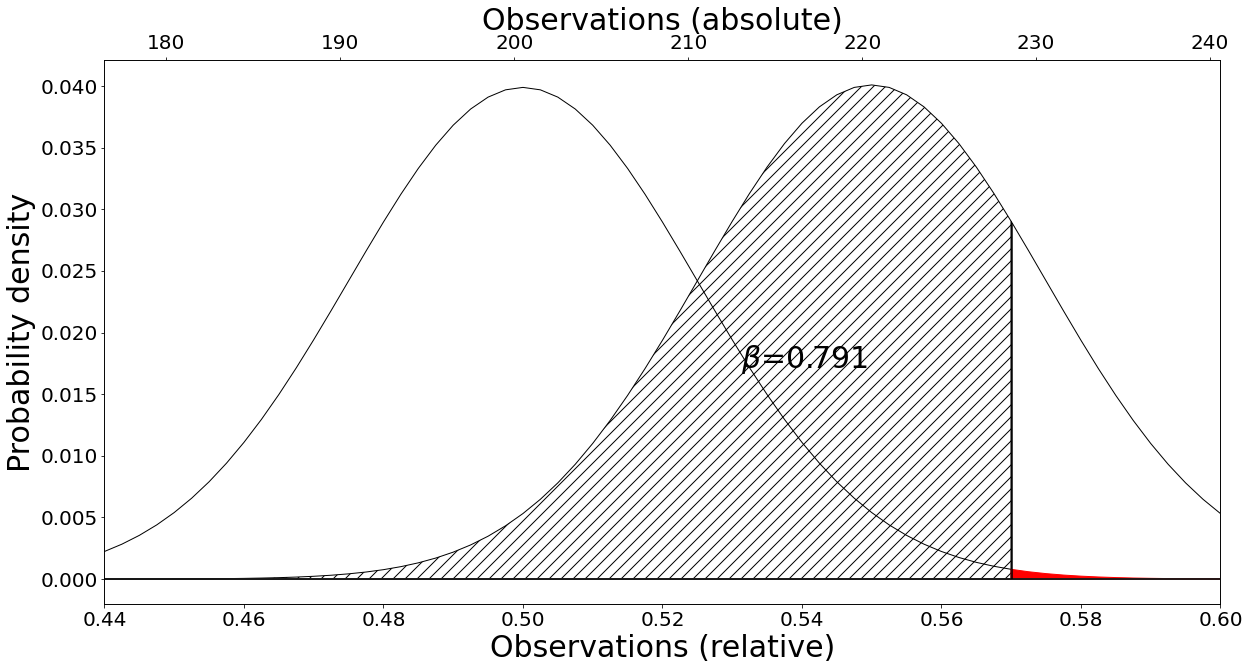

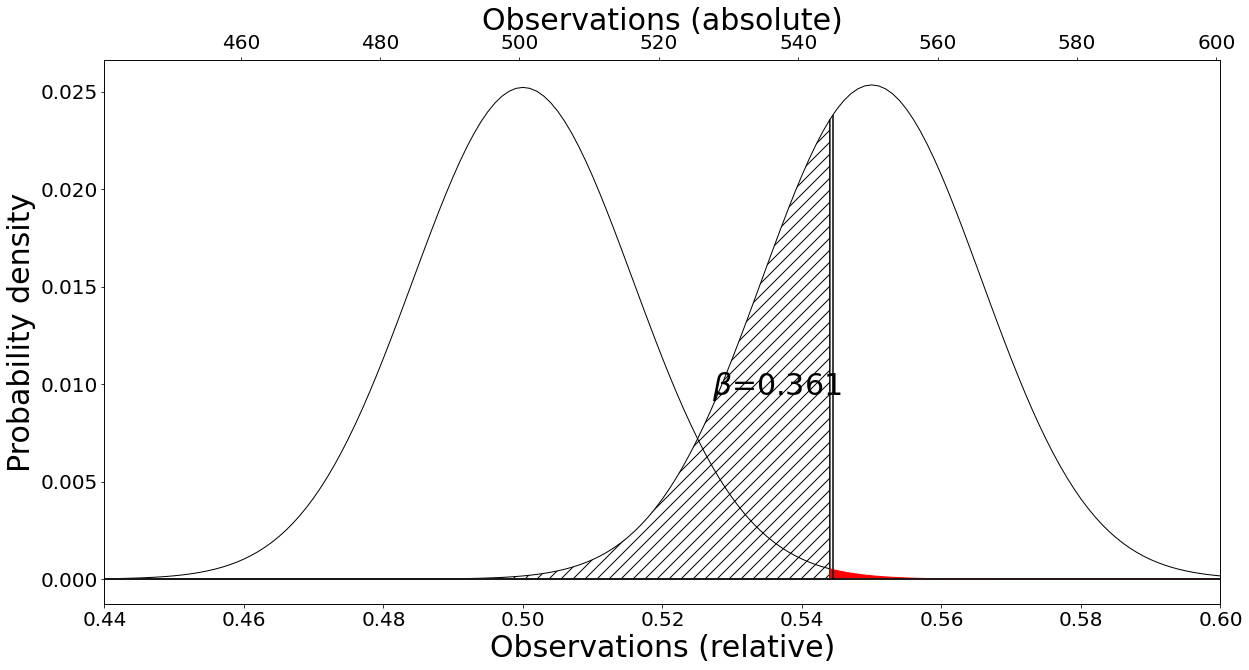

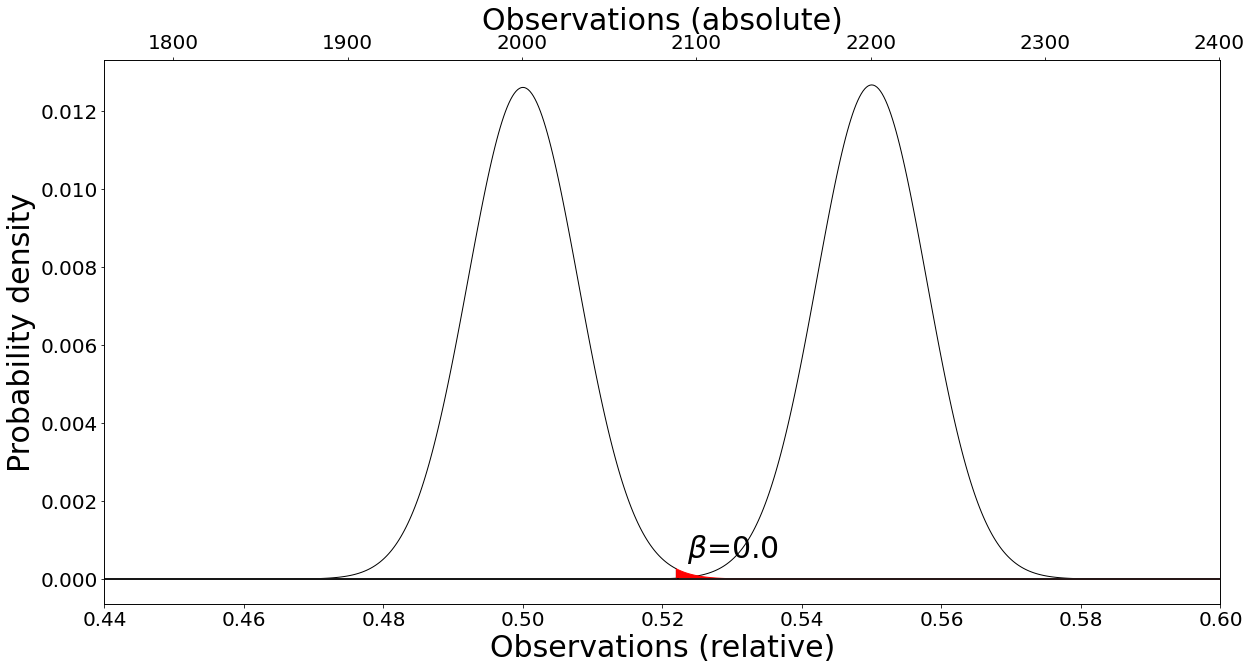

In [14]:
image(distribution_rand=distributions[0], distribution_bias=distributions[1], text_y = 0.45, file_name = 'Errors_sample_400.png')
image(distribution_rand=distributions[2], distribution_bias=distributions[3], text_y = 0.4, file_name = 'Errors_sample_1000.png')
image(distribution_rand=distributions[4], distribution_bias=distributions[5], text_y = 0.1, file_name = 'Errors_sample_4000.png')